In [24]:
# Import Libraries yang diperlukan

import pandas as pd
import numpy as np
import json

import scipy.stats as stats
from scipy.stats import variation
import statistics

import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
# eda = '/content/drive/MyDrive/Final Project Experiment/2. EDA.csv'
df = pd.read_csv('2. EDA.csv')
# df = pd.read_csv(eda)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days,order_day,order_day_num
0,68735df1b09b8a52d5db6320a17934ce,0e35b3a35d3f09b9079e2f91a01f2cab,3716,sao paulo,SP,857963f443c1183582fc6386fd62ddcf,delivered,2017-09-24 18:20:03,2017-09-24,2017-09-29 22:32:31,...,2,241.19,5138,sao paulo,SP,market_place,Other,14,Sunday,6
1,41110560ba94c2e86afc7a12ad56ad08,1d6cd35271e75ebf524d224021678911,98400,frederico westphalen,RS,91199340efe15554e4533e5ffe47a31b,delivered,2017-03-31 07:51:28,2017-03-31,2017-03-31 13:01:02,...,3,30.86,90230,porto alegre,RS,market_place,Other,4,Friday,4
2,a4ae42d510710bdfd23de09c1fce5410,0c4cd30defdfe37fc9d50089c553f2e5,7220,guarulhos,SP,3393e0117eefaf7abdee7c0ec9582632,delivered,2017-07-07 11:13:50,2017-07-07,2017-07-07 19:38:59,...,2,57.84,2310,sao paulo,SP,market_place,Other,3,Friday,4
3,4823c52e962bd334cf992817bcdff533,d7f36ed554c844d47a19567041894aa3,22270,rio de janeiro,RJ,469486849094bf1935cd99d96e117ded,delivered,2017-08-23 19:47:18,2017-08-23,2017-08-24 15:27:12,...,3,63.61,2310,sao paulo,SP,market_place,Other,9,Wednesday,2
4,7786e89e083495d8466993cd6b3fde4f,21d2d2a8120b8d9a6b5642ddd53d14fc,5015,sao paulo,SP,18f3d3d3d8f47205c56d03799039c61a,delivered,2018-02-07 16:36:46,2018-02-07,2018-02-08 16:33:00,...,1,140.22,89023,blumenau,SC,market_place,Other,8,Wednesday,2


In [26]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'has_comment',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'translated_cat', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'subcategory', 'Category',
       'delivery_time_days', 'order_day', 'order_day_num'],
      dtype='object')

In [27]:
df = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_approved_at', 'order_id', 'delivery_time_days', 'seller_id', 'seller_state', 'Category', 
        'subcategory', 'payment_type', 'payment_installments','price', 'freight_value', 'payment_value', 'order_day', 'review_score']]

In [28]:
df.duplicated().sum()

2

In [29]:
df = df[~df.duplicated()]

In [30]:
df_recency = df.groupby(by='customer_unique_id',
                        as_index=False)['order_approved_at'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']

df_recency['LastPurchaseDate'] = pd.to_datetime(df_recency['LastPurchaseDate'])

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,0011857aff0e5871ce5eb429f21cdaf5,2017-06-28,425
1,003ae409f37c3c30cb1c974af3a42692,2018-08-16,11
2,004288347e5e88a27ded2bb23747066c,2018-01-14,225
3,0047f3e16441284d757a8963344f6c59,2017-08-28,364
4,004ed862ea4e55f18868d3d782d10879,2017-08-08,384


In [31]:
frequency_df = df.groupby(
    by=['customer_unique_id'], as_index=False)['order_id'].nunique()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,0011857aff0e5871ce5eb429f21cdaf5,1
1,003ae409f37c3c30cb1c974af3a42692,1
2,004288347e5e88a27ded2bb23747066c,1
3,0047f3e16441284d757a8963344f6c59,1
4,004ed862ea4e55f18868d3d782d10879,1


In [32]:
frequency_df.Frequency.value_counts()/len(frequency_df)*100

Frequency
1    99.301746
2     0.648379
3     0.049875
Name: count, dtype: float64

In [33]:
df['payment_value'] = df['price'] + df['freight_value']
df['Total'] = df['payment_value']
monetary_df = df.groupby(by='customer_unique_id', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,0011857aff0e5871ce5eb429f21cdaf5,192.83
1,003ae409f37c3c30cb1c974af3a42692,216.32
2,004288347e5e88a27ded2bb23747066c,103.28
3,0047f3e16441284d757a8963344f6c59,76.18
4,004ed862ea4e55f18868d3d782d10879,109.29


In [34]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,0011857aff0e5871ce5eb429f21cdaf5,425,1,192.83
1,003ae409f37c3c30cb1c974af3a42692,11,1,216.32
2,004288347e5e88a27ded2bb23747066c,225,1,103.28
3,0047f3e16441284d757a8963344f6c59,364,1,76.18
4,004ed862ea4e55f18868d3d782d10879,384,1,109.29


In [35]:
rfm_df.rename(columns={'CustomerName': 'customer_unique_id'}, inplace=True)

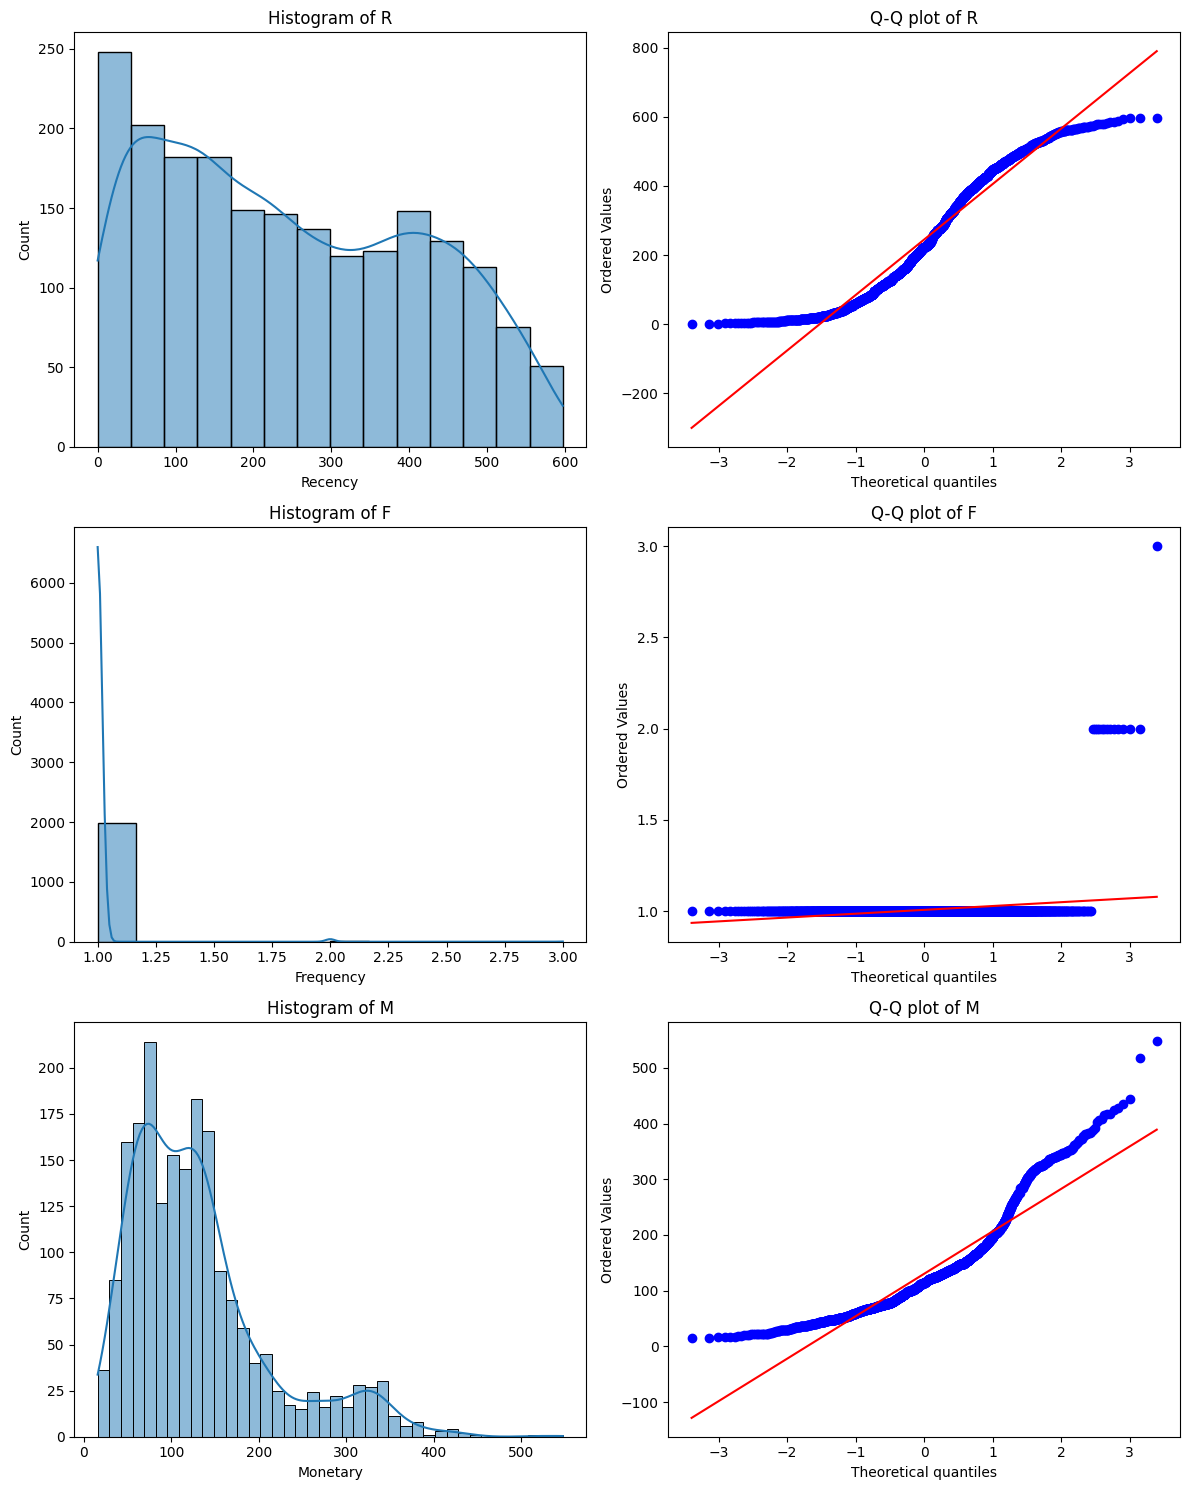

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Histogram R_rank
sns.histplot(rfm_df['Recency'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of R')

# Q-Q plot R_rank
stats.probplot(rfm_df['Recency'], dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('Q-Q plot of R')

# Histogram F_rank
sns.histplot(rfm_df['Frequency'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of F')

# Q-Q plot F_rank
stats.probplot(rfm_df['Frequency'], dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot of F')

# Histogram M_rank
sns.histplot(rfm_df['Monetary'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of M')

# Q-Q plot M_rank
stats.probplot(rfm_df['Monetary'], dist='norm', plot=axes[2, 1])
axes[2, 1].set_title('Q-Q plot of M')

plt.tight_layout()
plt.show()

In [37]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False, method='dense')
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True, method='dense')
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True, method='dense')

In [38]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (3*IQR)
    upper = Q3 + (3*IQR)
    return Q1, Q3, IQR, lower, upper

In [39]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2005.000000,2005.000000,2005.000000
mean,244.855362,1.007481,130.380898
std,164.902569,0.091799,81.111154
min,0.000000,1.000000,15.770000
25%,103.000000,1.000000,72.050000
50%,223.000000,1.000000,114.530000
75%,387.000000,1.000000,157.470000
max,597.000000,3.000000,547.740000


In [40]:
# Mode
mode_recency = statistics.mode(rfm_df['Recency'])
mode_frequency = statistics.mode(rfm_df['Frequency'])
mode_monetary = statistics.mode(rfm_df['Monetary'])

# Range
range_recency = rfm_df['Recency'].max() - rfm_df['Recency'].min()
range_frequency = rfm_df['Frequency'].max() - rfm_df['Frequency'].min()
range_monetary = rfm_df['Monetary'].max() - rfm_df['Monetary'].min()

# Variance
var_recency = statistics.variance(rfm_df['Recency'])
var_frequency = statistics.variance(rfm_df['Frequency'])
var_monetary = statistics.variance(rfm_df['Monetary'])

# Coefficient of Variation
cov_recency = rfm_df['Recency'].std() / rfm_df['Recency'].mean()
cov_frequency = rfm_df['Frequency'].std() / rfm_df['Frequency'].mean()
cov_monetary = rfm_df['Monetary'].std() / rfm_df['Monetary'].mean()

# Skewness
skewness = rfm_df.skew()
skewness_df = pd.DataFrame(skewness, columns=['skewness']).reset_index()
skewness_df.columns = ['variable', 'skewness']

# Kurtosis
kurtosis = rfm_df.kurtosis()
kurtosis_df = pd.DataFrame(kurtosis, columns=['kurtosis']).reset_index()
kurtosis_df.columns = ['variable', 'kurtosis']

# Collecting parameters in a list
des_parameter = [
    (mode_recency, mode_frequency, mode_monetary),
    (range_recency, range_frequency, range_monetary),
    (var_recency, var_frequency, var_monetary),  # Fixed typo: cov_monetary to var_monetary
    (cov_recency, cov_frequency, cov_monetary),
    (skewness_df['skewness'].loc[0], skewness_df['skewness'].loc[1], skewness_df['skewness'].loc[2]),
    (kurtosis_df['kurtosis'].loc[0], kurtosis_df['kurtosis'].loc[1], kurtosis_df['kurtosis'].loc[2])
]

# Creating the second descriptive statistics DataFrame
df_des2 = pd.DataFrame(des_parameter,
                       index=('mode', 'range', 'variance', 'coefficient_of_variation', 'skewness', 'kurtosis'),
                       columns=('Recency', 'Frequency', 'Monetary'))

df_des2

TypeError: could not convert string to float: '0011857aff0e5871ce5eb429f21cdaf5'

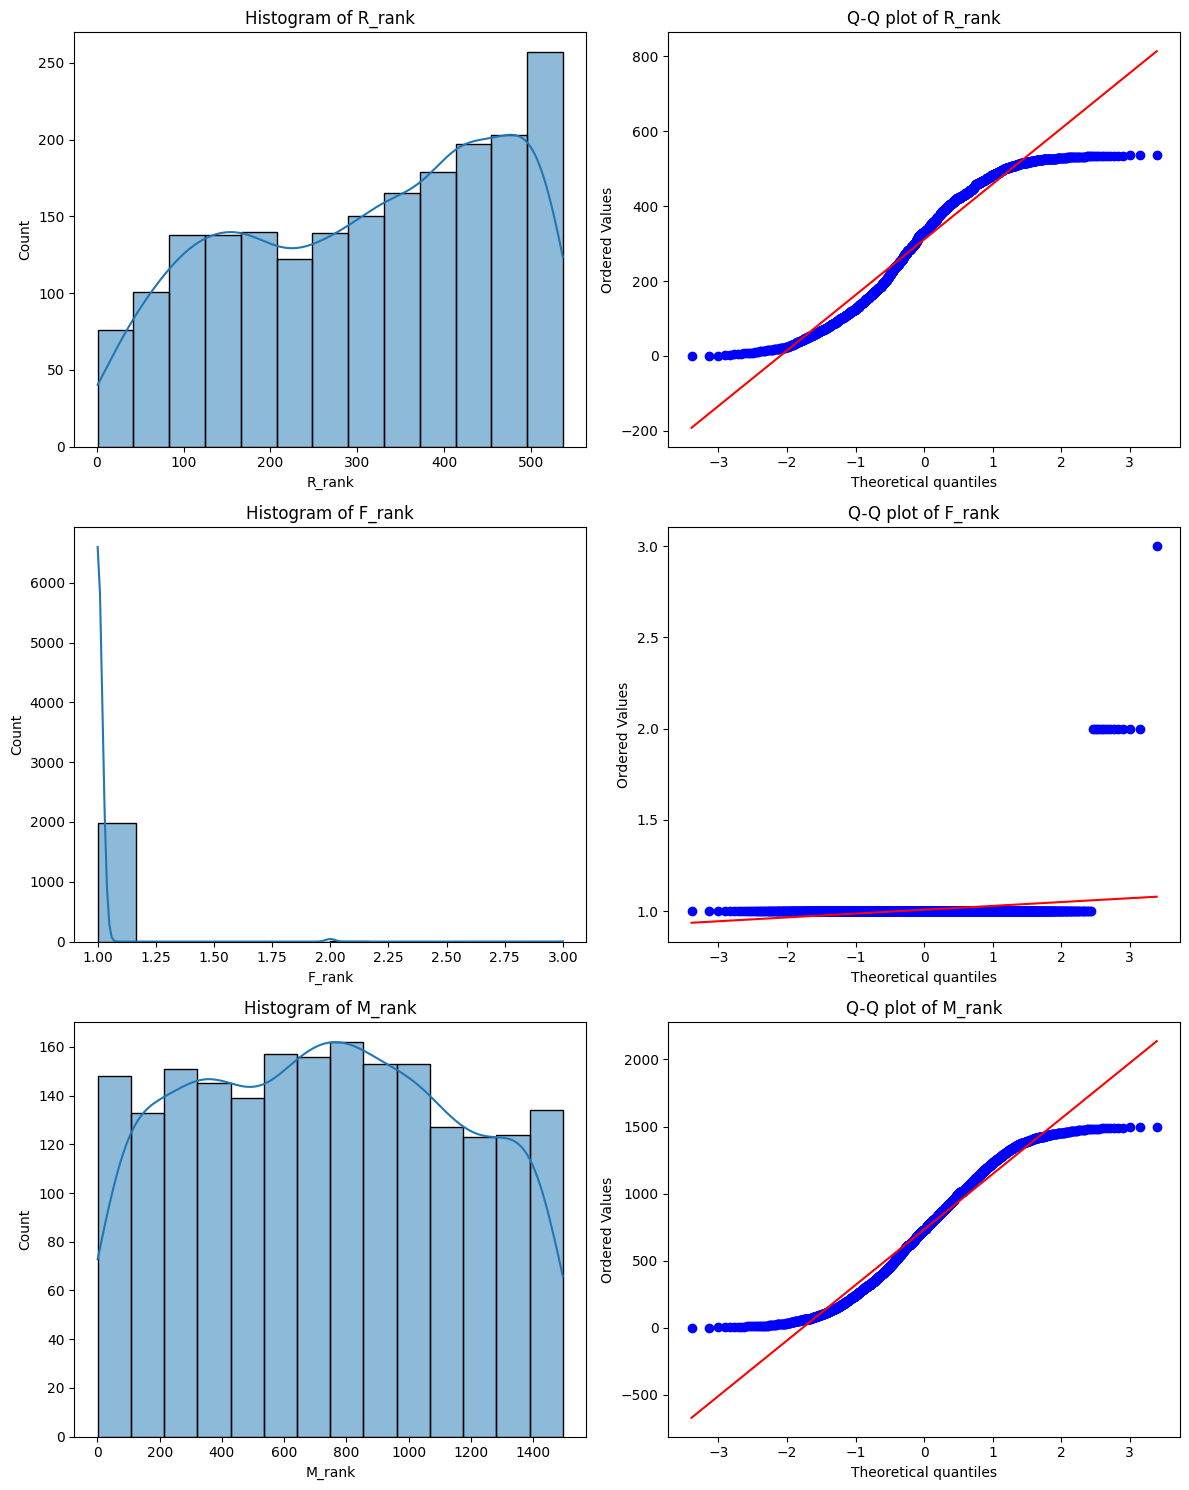

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Histogram R_rank
sns.histplot(rfm_df['R_rank'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of R_rank')

# Q-Q plot R_rank
stats.probplot(rfm_df['R_rank'], dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('Q-Q plot of R_rank')

# Histogram F_rank
sns.histplot(rfm_df['F_rank'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of F_rank')

# Q-Q plot F_rank
stats.probplot(rfm_df['F_rank'], dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot of F_rank')

# Histogram M_rank
sns.histplot(rfm_df['M_rank'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of M_rank')

# Q-Q plot M_rank
stats.probplot(rfm_df['M_rank'], dist='norm', plot=axes[2, 1])
axes[2, 1].set_title('Q-Q plot of M_rank')

plt.tight_layout()
plt.show()

In [42]:
# Memeriksa skewness dari kolom F_rank
skewness_frank_ = pd.Series(rfm_df['F_rank']).skew()

# Memeriksa skewness dari kolom M_rank
skewness_mrank_ = pd.Series(rfm_df['M_rank']).skew()

# Memeriksa skewness dari kolom R_rank
skewness_rrank_ = pd.Series(rfm_df['R_rank']).skew()

print("Skewness F_rank box cox:", skewness_frank_)
print("Skewness M_rank box cox:", skewness_mrank_)
print("Skewness R_rank box cox:", skewness_rrank_)

Skewness F_rank box cox: 13.314194049305955
Skewness M_rank box cox: 0.03920840629801178
Skewness R_rank box cox: -0.2777128767706996


In [43]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,0011857aff0e5871ce5eb429f21cdaf5,425,1,192.83,143.0,1.0,1215.0
1,003ae409f37c3c30cb1c974af3a42692,11,1,216.32,528.0,1.0,1283.0
2,004288347e5e88a27ded2bb23747066c,225,1,103.28,328.0,1.0,657.0
3,0047f3e16441284d757a8963344f6c59,364,1,76.18,201.0,1.0,432.0
4,004ed862ea4e55f18868d3d782d10879,384,1,109.29,182.0,1.0,698.0
...,...,...,...,...,...,...,...
2000,fedb65c8708f8aecde6150459592e8f6,503,1,147.07,72.0,1.0,1009.0
2001,ff3bcc94d97e257e7619a2161375cdfe,564,1,84.16,18.0,1.0,508.0
2002,ff5dc18f33f97199609b4dd60918b6ae,145,1,170.63,404.0,1.0,1136.0
2003,ffa17ff63f95ea3c838670e61d2666e0,532,1,84.16,46.0,1.0,508.0


In [44]:
import scipy.stats as stats

# Melakukan Box-Cox transform pada kolom F_rank
rfm_df['F_rank_boxcox'], _ = stats.boxcox(rfm_df['F_rank'])

# Melakukan Box-Cox transform pada kolom M_rank
rfm_df['M_rank_boxcox'], _ = stats.boxcox(rfm_df['M_rank'])

# Melakukan Box-Cox transform pada kolom R_rank
rfm_df['R_rank_boxcox'], _ = stats.boxcox(rfm_df['R_rank'])

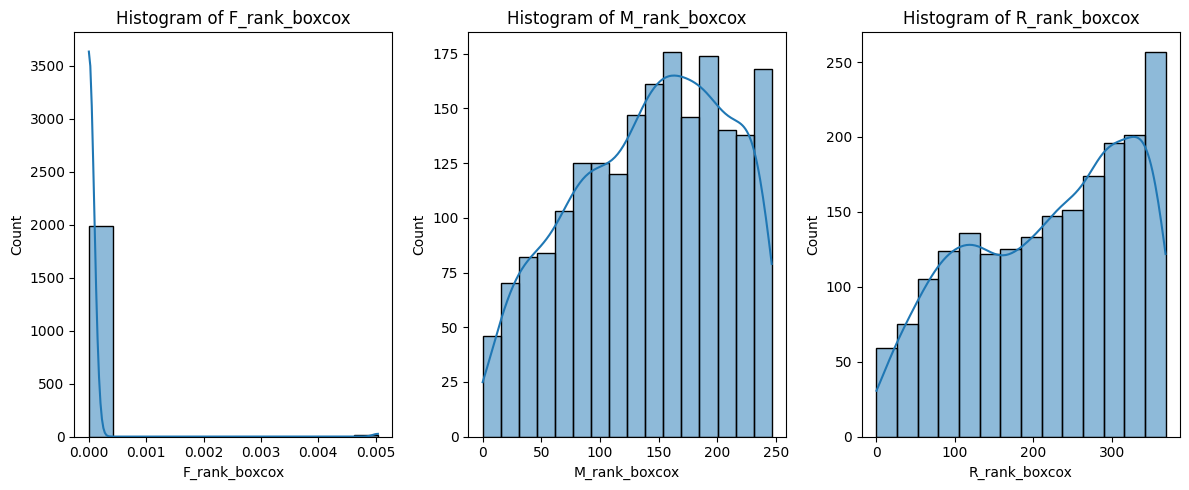

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Grafik pertama
sns.histplot(rfm_df['F_rank_boxcox'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of F_rank_boxcox')

# Grafik kedua
sns.histplot(rfm_df['M_rank_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of M_rank_boxcox')

# Grafik ketiga
sns.histplot(rfm_df['R_rank_boxcox'], kde=True, ax=axes[2])
axes[2].set_title('Histogram of R_rank_boxcox')

plt.tight_layout()
plt.show()

In [46]:
# Memeriksa skewness dari kolom F_rank
skewness_frank = pd.Series(rfm_df['F_rank_boxcox']).skew()

# Memeriksa skewness dari kolom M_rank
skewness_mrank = pd.Series(rfm_df['M_rank_boxcox']).skew()

# Memeriksa skewness dari kolom R_rank
skewness_rrank = pd.Series(rfm_df['R_rank_boxcox']).skew()

print("Skewness F_rank box cox:", skewness_frank)
print("Skewness M_rank box cox:", skewness_mrank)
print("Skewness R_rank box cox:", skewness_rrank)

Skewness F_rank box cox: 11.850375699026785
Skewness M_rank box cox: -0.27369119833844635
Skewness R_rank box cox: -0.3337976171873814


In [47]:
rfm_df.F_rank.value_counts()

F_rank
1.0    1991
2.0      13
3.0       1
Name: count, dtype: int64

In [48]:
rfm_df.F_rank_boxcox.value_counts()

F_rank_boxcox
0.000000    1991
0.005042      14
Name: count, dtype: int64

In [49]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,F_rank_boxcox,M_rank_boxcox,R_rank_boxcox
0,0011857aff0e5871ce5eb429f21cdaf5,425,1,192.83,143.0,1.0,1215.0,0.0,212.727898,107.125503
1,003ae409f37c3c30cb1c974af3a42692,11,1,216.32,528.0,1.0,1283.0,0.0,221.130109,363.036357
2,004288347e5e88a27ded2bb23747066c,225,1,103.28,328.0,1.0,657.0,0.0,137.260480,232.894926
3,0047f3e16441284d757a8963344f6c59,364,1,76.18,201.0,1.0,432.0,0.0,101.698983,147.377632
4,004ed862ea4e55f18868d3d782d10879,384,1,109.29,182.0,1.0,698.0,0.0,143.322006,134.296147


In [50]:
dk = rfm_df[['customer_unique_id', 'R_rank', 'F_rank', 'M_rank']].copy()
dk.head()

,customer_unique_id,R_rank,F_rank,M_rank
0,0011857aff0e5871ce5eb429f21cdaf5,143.0,1.0,1215.0
1,003ae409f37c3c30cb1c974af3a42692,528.0,1.0,1283.0
2,004288347e5e88a27ded2bb23747066c,328.0,1.0,657.0
3,0047f3e16441284d757a8963344f6c59,201.0,1.0,432.0
4,004ed862ea4e55f18868d3d782d10879,182.0,1.0,698.0


In [51]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(dk['R_rank'], 4, labels = r_labels)

f_labels = range(1,5)
f_quartiles = pd.cut(dk['F_rank'], 4, labels = f_labels)

m_labels = range(1,5)
m_quartiles = pd.qcut(dk['M_rank'], 4, labels = m_labels)

dk = dk.assign(R=r_quartiles.values)
dk = dk.assign(F=f_quartiles.values)
dk = dk.assign(M=m_quartiles.values)

In [52]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

dk['RFM_Segment'] = dk.apply(join_rfm, axis=1)
dk['RFM_Score'] = dk[['R', 'F', 'M']].sum(axis=1)

In [53]:
# Largest RFM Segments
dk.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
211    141
311    135
413    134
214    134
112    134
412    131
313    131
113    127
414    123
114    120
dtype: int64

In [54]:
# Bottom 5 rows
dk[dk['RFM_Segment']=='111'][:5]

,customer_unique_id,R_rank,F_rank,M_rank,R,F,M,RFM_Segment,RFM_Score
27,03146a8b7c6feaac56b53e8e834eccd2,492.0,1.0,345.0,1,1,1,111,3
55,06e9efd9908fc2459e4a34b0f616243a,458.0,1.0,282.0,1,1,1,111,3
57,073cb6890c1f05f67bdce2cb9febb087,522.0,1.0,109.0,1,1,1,111,3
68,08b2a675de579ef181675f82c081fca6,456.0,1.0,233.0,1,1,1,111,3
79,096cf3c64ccb070286aaaf4de08f866d,496.0,1.0,96.0,1,1,1,111,3


In [55]:
dk.groupby('RFM_Score').agg({
    'R_rank': 'mean',
    'F_rank': 'mean',
    'M_rank': ['mean', 'count']
})

R_rank    F_rank       M_rank      
                 mean      mean         mean count
RFM_Score                                         
3          491.823009  1.000000   183.575221   113
4          445.021818  1.000000   373.301818   275
5          377.866492  1.000000   540.013089   382
6          311.667396  1.002188   729.975930   457
7          250.725000  1.010000   923.162500   400
8          182.230769  1.004049  1079.514170   247
9          102.629921  1.031496  1290.834646   127
10          91.000000  2.000000  1300.000000     3
11         326.000000  3.000000  1494.000000     1

In [56]:
def segment_me(dk):
    if dk['RFM_Score'] >= 8:
        return 'Best'
    elif (dk['RFM_Score'] >= 6) and (dk['RFM_Score'] < 8):
        return 'Good'
    elif (dk['RFM_Score'] >= 4) and (dk['RFM_Score'] < 6):
        return 'Potential Lost'
    else:
        return 'Lost'

In [57]:
dk['Segment'] = dk.apply(segment_me, axis=1)
dk.groupby('Segment').agg({
    'R_rank': 'mean',
    'F_rank': 'mean',
    'M_rank': ['mean', 'count']
}).round(1)

R_rank F_rank  M_rank      
                 mean   mean    mean count
Segment                                   
Best            155.1    1.0  1153.4   378
Good            283.2    1.0   820.1   857
Lost            491.8    1.0   183.6   113
Potential Lost  406.0    1.0   470.2   657

In [58]:
dk.head()

,customer_unique_id,R_rank,F_rank,M_rank,R,F,M,RFM_Segment,RFM_Score,Segment
0,0011857aff0e5871ce5eb429f21cdaf5,143.0,1.0,1215.0,4,1,4,414,9,Best
1,003ae409f37c3c30cb1c974af3a42692,528.0,1.0,1283.0,1,1,4,114,6,Good
2,004288347e5e88a27ded2bb23747066c,328.0,1.0,657.0,3,1,2,312,6,Good
3,0047f3e16441284d757a8963344f6c59,201.0,1.0,432.0,3,1,2,312,6,Good
4,004ed862ea4e55f18868d3d782d10879,182.0,1.0,698.0,3,1,2,312,6,Good


In [59]:
df.to_csv('3. feature_engineering.csv', index=False)
rfm_df.to_csv('3. rfm_df.csv', index=False)